In [16]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plot
from keras.utils import to_categorical
%matplotlib inline

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
x_train.shape[1]

28

In [20]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

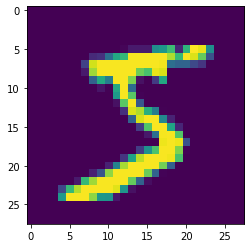

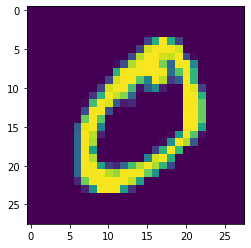

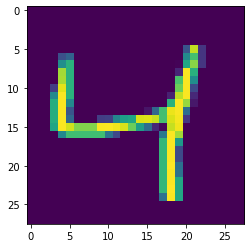

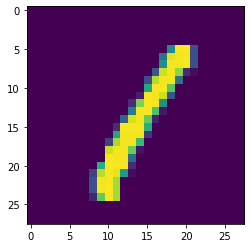

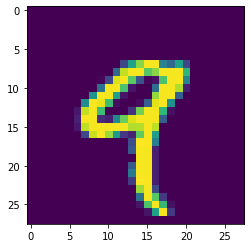

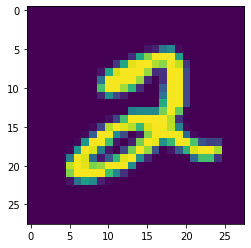

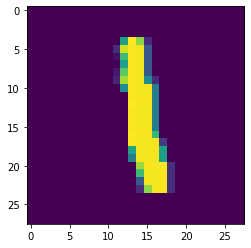

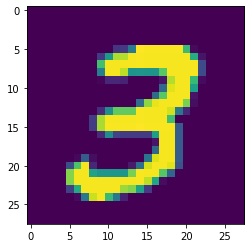

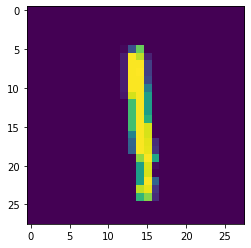

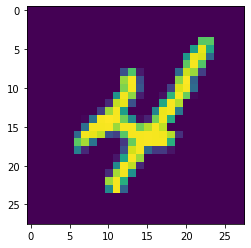

In [23]:
from matplotlib import pyplot as plt
for i in range(10):
    plt.imshow(x_train[i], interpolation='nearest')
    plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [25]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [14]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),filters=16, kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, kernel_initializer='he_normal',activation='elu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(10, kernel_initializer='he_normal',activation='elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
#model.add(Dense(10, kernel_initializer='he_normal',activation='elu'))
#model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(10,kernel_initializer='he_normal',activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=10, batch_size = 10, verbose=2)

model.evaluate(x_train, y_train)

model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 6,080
Trainable params: 6,060
Non-trainable params: 20
___________________________________________________

KeyboardInterrupt: 

In [ ]:
plot.plot(history.history['get_f1'])
plot.plot(history.history['val_get_f1'])
plot.legend(['training','validation'])